## Klausimas: Kaip keitėsi eismo saugumo situacija 2016-2021 metais Lietuvoje?

### Duomenys paimti iš:
- https://data.gov.lt/dataset/eismo-ivykiu-ivykusiu-lietuvos-respublikoje-kuriu-metu-zuvo-ir-ar-buvo-suzeisti-zmones-duomenys

### Hipotezės:
1. Kaip keitėsi įvykių kiekis Lietuvoje duotu laikotarpiu? Kaip atrodė 2019 metų įvykių pasiskirstimas?
2. Kaip keitėsi įvykių rūšių kiekis Lietuvoje duotu laikotarpiu?
3. Kurios eismo įvykių rūšys buvo dažniausios?
4. Sužeistų/žuvusių asmenų kiekis, jo kitimas duotu laikotarpiu. Kiek iš jų buvo vaikai, kaip kito šis dydis?
5. Ar girti ar apsvaigę vairuotojai sukeldavo daugiau eismo įvykių, kur būdavo sužeidžiami žmonės?
6. Kokia yra meteoroliginių sąlygų įtaka įvykių kiekiui? Kaip nuo šių sąlygų priklauso susidūrimų kiekis?
7. Kokia yra paros meto įtaka įvykių kiekiui? Kaip nuo paros meto priklauso užvažiavimo ant pėsčiojo kiekis?
8. Kokia yra dangos buklės įtaka įvykių kiekiui? Kaip nuo dangos būklės priklauso apvirtimų kiekis?

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
import warnings as w
w.filterwarnings('ignore')

In [85]:
# Galima nurodyti ir kitus metus
pradz = 2016
pab = 2021

In [86]:
DB = cnt.connect(
    host = '88.223.121.130',
    port = 3306,
    user = 'user',
    password = 'slaptazodis'
)

c = DB.cursor()
c.execute('USE works')

1. Kaip keitėsi įvykių kiekis Lietuvoje duotu laikotarpiu?

In [87]:
sql1 = '''
SELECT YEAR(registravimoData) AS metai, iskaitinis, rusis, COUNT(*) as kiekis
FROM EismIvyk{}
WHERE rusis != 'None'
GROUP BY rusis, iskaitinis;
'''
for y in range(pradz,pab+1):
    eism0 = pd.read_sql_query(sql1.format(y) ,DB)
    if y == pradz:
        eism = eism0
    else:
        eism = eism.append(eism0)
eism['iskaitinis'] = eism['iskaitinis'].astype(int)
eism

,metai,iskaitinis,rusis,kiekis
0,2016,0,Apvirtimas,590
1,2016,1,Apvirtimas,316
2,2016,0,Kiti eismo įvykiai,4140
3,2016,1,Kiti eismo įvykiai,362
4,2016,0,Susidūrimas,4842
...,...,...,...,...
17,2021,1,Užvažiavimas ant gyvūno,32
18,2021,0,Užvažiavimas ant kliūties,1834
19,2021,1,Užvažiavimas ant kliūties,60
20,2021,0,Užvažiavimas ant pėsčiojo,161


In [88]:
kiekis = []
kiekis_isk = []
for y in range(pradz,pab+1):
    kiekis.append(eism[eism['metai'] == y]['kiekis'].sum())
    kiekis_isk.append(eism[(eism['metai'] == y) & (eism['iskaitinis'] == 1)]['kiekis'].sum())

Kaip atrodė 2019 metų įvykių pasiskirstimas?

In [89]:
eism19 = pd.read_json('https://data.gov.lt/dataset/509/download/10094/EI_2016%2012%2031.json')

In [90]:
eism19['registravimoData'] = pd.to_datetime(eism19['registravimoData'])
eism19['DATA'] = eism19['registravimoData'].dt.month
eism19_counts = eism19['DATA'].value_counts().sort_index(ascending=True)
eism19_counts_isk = eism19[eism19['iskaitinis'] == 1]['DATA'].value_counts().sort_index(ascending=True)

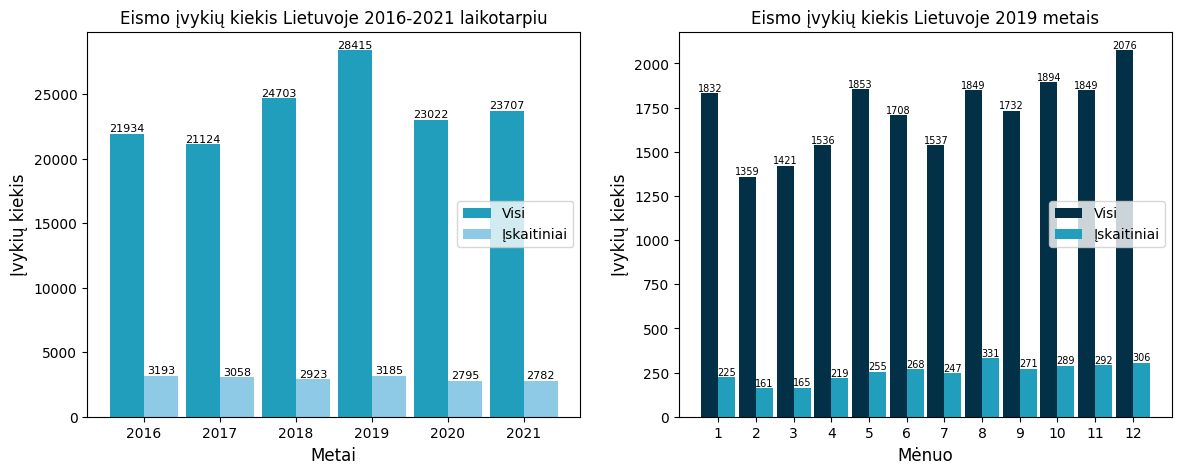

In [91]:
x = np.arange(pradz,pab+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

w=0.45
A = ax1.bar(x-w/2, kiekis, width=w, label='Visi', color='#219ebc')
B = ax1.bar(x+w/2, kiekis_isk, width=w, label='Įskaitiniai', color='#8ecae6')
ax1.bar_label(A, fontsize=8)
ax1.bar_label(B, fontsize=8)
ax1.set_xlabel('Metai', fontsize=12)
ax1.set_ylabel('Įvykių kiekis', fontsize=12)
ax1.set_title('Eismo įvykių kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')
ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1.legend(loc=5)

C = ax2.bar(eism19_counts.index-w/2, eism19_counts.values, width=w, color='#023047', label='Visi')
D = ax2.bar(eism19_counts_isk.index+w/2, eism19_counts_isk.values, width=w, color='#219ebc', label='Įskaitiniai')
ax2.bar_label(C, fontsize=7)
ax2.bar_label(D, fontsize=7)
ax2.set_xlabel('Mėnuo', fontsize=12)
ax2.set_ylabel('Įvykių kiekis', fontsize=12)
ax2.set_title('Eismo įvykių kiekis Lietuvoje 2019 metais')
ax2.set_xticks(eism19_counts.index)
ax2.set_xticklabels(eism19_counts.index)
ax2.legend(loc=5)

plt.show()

2. Kaip keitėsi įvykių rūšių kiekis Lietuvoje duotu laikotarpiu?

In [92]:
rus_kiekis = []
rus_kiekis_isk = []
for y in range(pradz,pab+1):
    rusis = eism[eism['metai'] == y]['rusis'].value_counts().index
    rus_kiekis.append(len(rusis))
    rusis_isk = eism[(eism['metai'] == y) & (eism['iskaitinis'] == 1)]['rusis'].value_counts().index
    rus_kiekis_isk.append(len(rusis_isk))

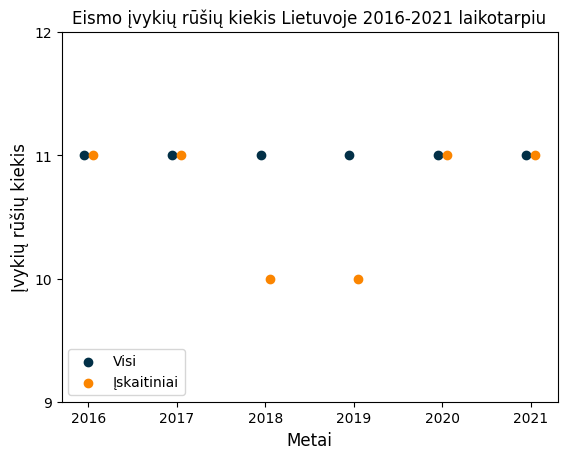

In [93]:
fig, ax = plt.subplots()

w=0.1
ax.scatter(x-w/2, rus_kiekis, label='Visi', color='#023047')
ax.scatter(x+w/2, rus_kiekis_isk, label='Įskaitiniai', color='#fb8500')
ax.set_xlabel('Metai', fontsize=12)
ax.set_ylabel('Įvykių rūšių kiekis', fontsize=12)
ax.set_title('Eismo įvykių rūšių kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.set_yticks([9, 10, 11, 12])
ax.legend(loc=3)

plt.show()

3. Kurios eismo įvykių rūšys buvo dažniausios?

In [94]:
daz = []
daz_isk = []
for rus in rusis:
    daz.append(eism[eism['rusis'] == rus]['kiekis'].sum())
for rus_i in rusis_isk:
    daz_isk.append(eism[(eism['rusis'] == rus_i) & (eism['iskaitinis'] == 1)]['kiekis'].sum())

df = pd.DataFrame(dict(rusis=rusis, daznis=daz))
daznis = df.sort_values('daznis', ascending=True)

df_isk = pd.DataFrame(dict(rusis=rusis, daznis=daz_isk))
daznis_isk = df_isk.sort_values('daznis', ascending=True)

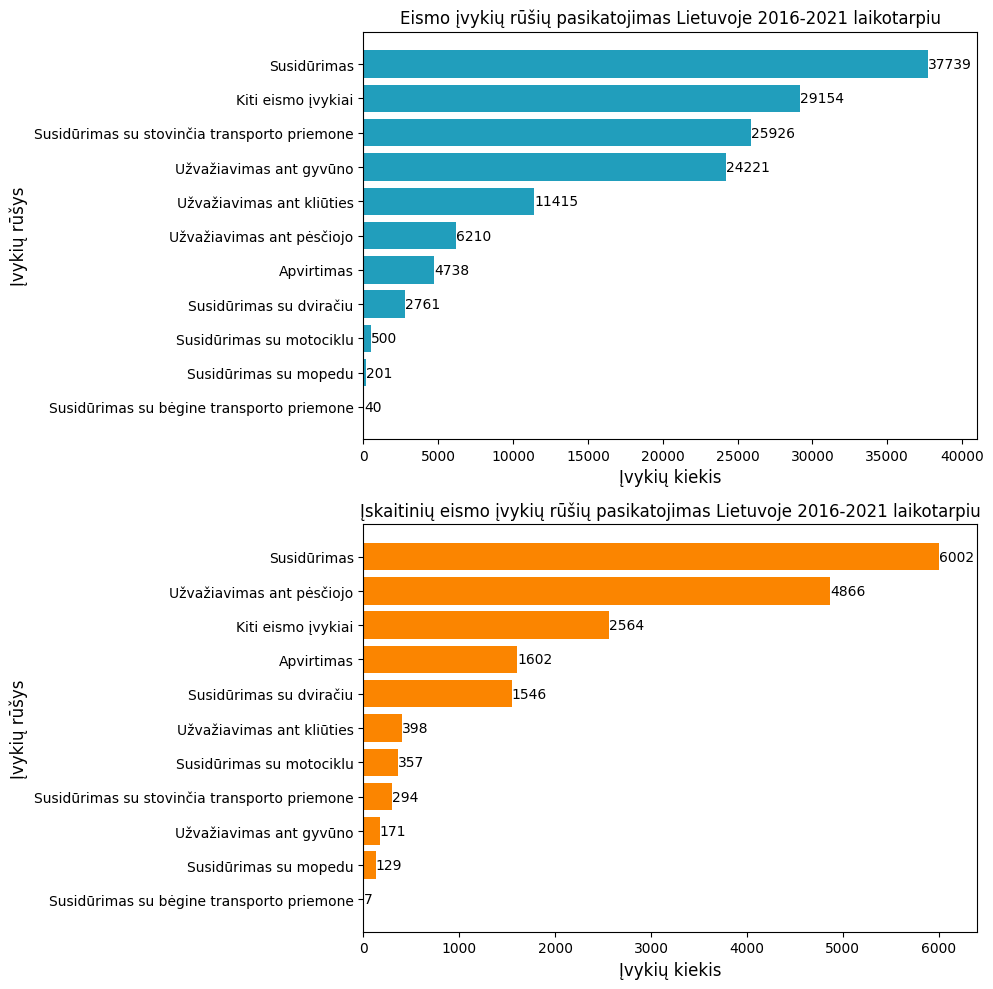

In [95]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

A = ax1.barh(daznis['rusis'], daznis['daznis'], color='#219ebc')
ax1.bar_label(A)
ax1.set_xlim(0, 41000)
ax1.set_xlabel('Įvykių kiekis', fontsize=12)
ax1.set_ylabel('Įvykių rūšys', fontsize=12)
ax1.set_title('Eismo įvykių rūšių pasikatojimas Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

B = ax2.barh(daznis_isk['rusis'], daznis_isk['daznis'], color='#fb8500')
ax2.bar_label(B)
ax2.set_xlim(0,6400)
ax2.set_xlabel('Įvykių kiekis', fontsize=12)
ax2.set_ylabel('Įvykių rūšys', fontsize=12)
ax2.set_title('Įskaitinių eismo įvykių rūšių pasikatojimas Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

plt.tight_layout()
plt.show()

4. Sužeistų/žuvusių asmenų kiekis, jo kitimas duotu laikotarpiu. Kiek iš jų buvo vaikai, kaip kito šis dydis?

In [96]:
sql2 = '''
SELECT SUM({var}) AS kiekis
FROM EismIvyk{m}
WHERE {var} != 0;
'''

suz = []
suz_vaik = []
zuv = []
zuv_vaik = []
for y in range(pradz,pab+1):
    df = pd.read_sql_query(sql2.format(var='suzeistuSkaicius', m=y) ,DB)
    suz.append(df.values[0][0])

    df = pd.read_sql_query(sql2.format(var='suzeistaVaiku', m=y) ,DB)
    suz_vaik.append(df.values[0][0])

    df = pd.read_sql_query(sql2.format(var='zuvusiuSkaicius', m=y) ,DB)
    zuv.append(df.values[0][0])

    df = pd.read_sql_query(sql2.format(var='zuvVaiku', m=y) ,DB)
    zuv_vaik.append(df.values[0][0])

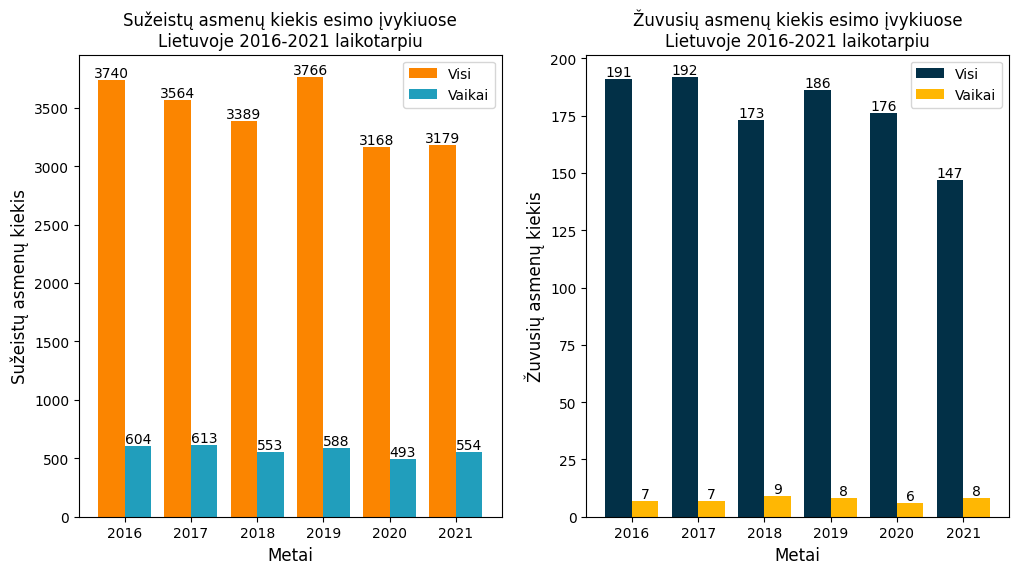

In [97]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

w=0.4
A = ax1.bar(x-w/2, suz, width=w, label='Visi', color='#fb8500')
B = ax1.bar(x+w/2, suz_vaik, width=w, label='Vaikai', color='#219ebc')
ax1.bar_label(A)
ax1.bar_label(B)
ax1.set_xlabel('Metai', fontsize=12)
ax1.set_ylabel('Sužeistų asmenų kiekis', fontsize=12)
ax1.set_title('Sužeistų asmenų kiekis esimo įvykiuose\nLietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')
ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1.legend()

C = ax2.bar(x-w/2, zuv, width=w, label='Visi', color='#023047')
D = ax2.bar(x+w/2, zuv_vaik, width=w, label='Vaikai', color='#ffb703')
ax2.bar_label(C)
ax2.bar_label(D)
ax2.set_xlabel('Metai', fontsize=12)
ax2.set_ylabel('Žuvusių asmenų kiekis', fontsize=12)
ax2.set_title('Žuvusių asmenų kiekis esimo įvykiuose\nLietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')
ax2.set_xticks(x)
ax2.set_xticklabels(x)
ax2.legend()

plt.show()

5. Ar girti ar apsvaigę vairuotojai sukeldavo daugiau eismo įvykių, kur būdavo sužeidžiami žmonės?

In [98]:
sql3 = '''
SELECT COUNT(*) AS kiekis
FROM EismIvyk{m}
WHERE {var} = 'Taip';
'''

sql4 = '''
SELECT COUNT(*) AS kiekis
FROM EismIvyk{}
'''

girt = 0
apsv = 0
kiti = 0
for y in range(pradz,pab+1):
    c.execute(sql3.format(m=y, var='neblaivusKaltininkai'))
    ats1 = c.fetchall()[0][0]
    girt = girt + ats1

    c.execute(sql3.format(m=y, var='apsvaigeKaltininkai'))
    ats2 = c.fetchall()[0][0]
    apsv = apsv + ats2

    c.execute(sql4.format(y))
    ats3 = c.fetchall()[0][0]
    kiti = kiti + (ats3-ats2-ats1)

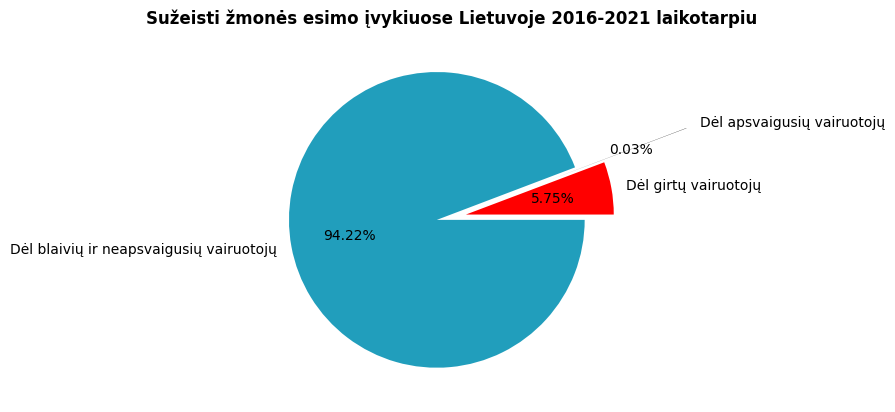

In [99]:
fig, ax = plt.subplots()

label=['Dėl girtų vairuotojų', 'Dėl apsvaigusių vairuotojų', 'Dėl blaivių ir neapsvaigusių vairuotojų']
ax.pie([girt, apsv, kiti], labels=label, autopct='%0.2f%%', explode=[0.1, 0.7, 0.1], colors=['r','black', '#219ebc'])
ax.set_title('Sužeisti žmonės esimo įvykiuose Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu', fontweight="bold")

plt.show()

6. Kokia yra meteoroliginių sąlygų įtaka įvykių kiekiui? Kaip nuo šių sąlygų priklauso susidūrimų kiekis?

In [100]:
sql5 = '''
SELECT {var}, COUNT(*) AS kiekis
FROM EismIvyk{m}
WHERE {var} != 'None'
GROUP BY {var}
ORDER BY {var} ASC;
'''
met = []
counts = []
for y in range(pradz,pab+1):
    c.execute(sql5.format(m=y, var='meteoSalygos'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            met.append(eil[0])
            counts.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts[i] = counts[i] + ats[i][1]

In [101]:
df = pd.DataFrame(dict(meteoSalygos=met, kiekis=counts))
mete = df.sort_values('kiekis', ascending=True)
mete

,meteoSalygos,kiekis
4,Pūga,248
7,Stiprus vėjas,370
3,Lijundra,1370
5,Rūkas,1657
6,"Sniegas, kruša",4346
2,Lietus,12371
0,Apsiniaukę,46606
1,Giedra,75937


In [102]:
sql6 = '''
SELECT {var}, COUNT(*) AS kiekis
FROM EismIvyk{m}
WHERE {var} != 'None' AND rusis = '{rus}'
GROUP BY {var}, rusis
ORDER BY {var} ASC;
'''
met_sus = []
counts_sus = []
for y in range(pradz,pab+1):
    c.execute(sql6.format(m=y, var='meteoSalygos', rus='Susidūrimas'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            met_sus.append(eil[0])
            counts_sus.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts_sus[i] = counts_sus[i] + ats[i][1]

In [103]:
df = pd.DataFrame(dict(meteoSalygos=met_sus, kiekis=counts_sus))
mete_sus = df.sort_values('kiekis', ascending=True)
mete_sus

,meteoSalygos,kiekis
7,Stiprus vėjas,45
4,Pūga,74
5,Rūkas,229
3,Lijundra,293
6,"Sniegas, kruša",997
2,Lietus,3195
0,Apsiniaukę,12374
1,Giedra,20532


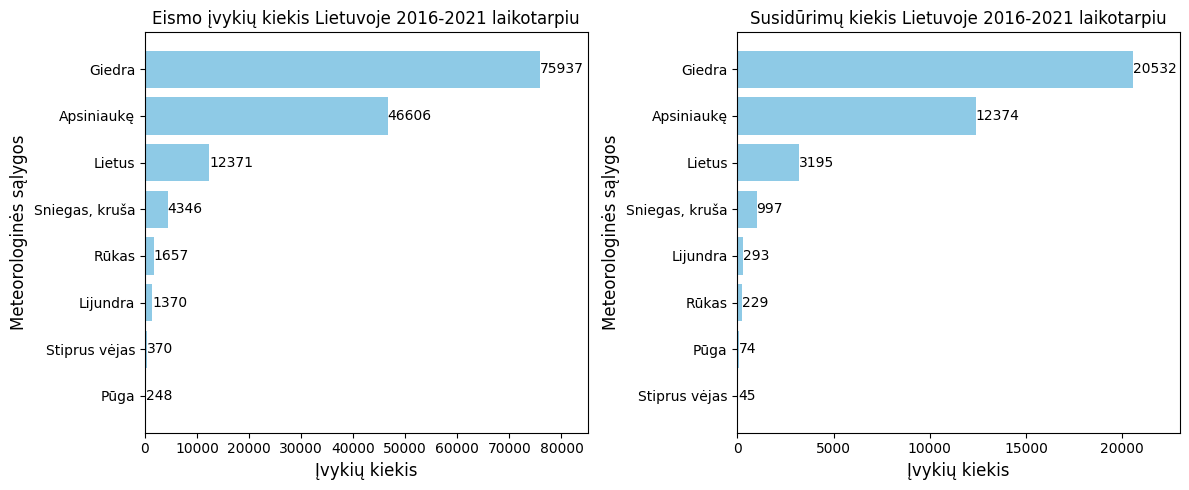

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

A = ax1.barh(mete['meteoSalygos'], mete['kiekis'], color='#8ecae6')
ax1.bar_label(A)
ax1.set_xlim(0, 85000)
ax1.set_xlabel('Įvykių kiekis', fontsize=12)
ax1.set_ylabel('Meteorologinės sąlygos', fontsize=12)
ax1.set_title('Eismo įvykių kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

B = ax2.barh(mete_sus['meteoSalygos'], mete_sus['kiekis'], color='#8ecae6')
ax2.bar_label(B)
ax2.set_xlim(0, 23000)
ax2.set_xlabel('Įvykių kiekis', fontsize=12)
ax2.set_ylabel('Meteorologinės sąlygos', fontsize=12)
ax2.set_title('Susidūrimų kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

plt.tight_layout()
plt.show()

7. Kokia yra paros meto įtaka įvykių kiekiui? Kaip nuo paros meto priklauso užvažiavimo ant pėsčiojo kiekis?

In [105]:
par = []
counts = []
for y in range(pradz,pab+1):
    c.execute(sql5.format(m=y, var='parosMetas'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            par.append(eil[0])
            counts.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts[i] = counts[i] + ats[i][1]

df = pd.DataFrame(dict(parosMetas=par, kiekis=counts))
paros = df.sort_values('kiekis', ascending=True)

par_uz = []
counts_uz = []
for y in range(pradz,pab+1):
    c.execute(sql6.format(m=y, var='parosMetas', rus='Užvažiavimas ant pėsčiojo'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            par_uz.append(eil[0])
            counts_uz.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts_uz[i] = counts_uz[i] + ats[i][1]

df = pd.DataFrame(dict(parosMetas=par_uz, kiekis=counts_uz))
paros_us = df.sort_values('kiekis', ascending=True)

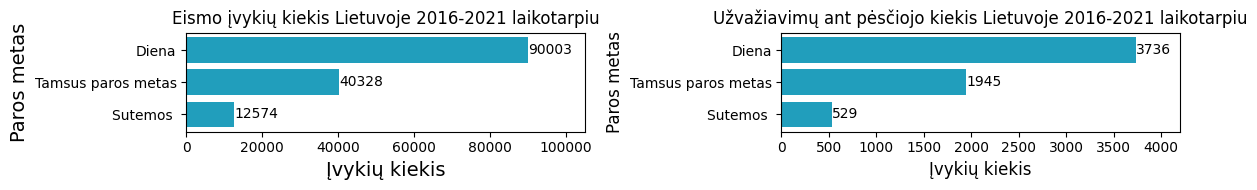

In [106]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,2))

A = ax1.barh(paros['parosMetas'], paros['kiekis'], color='#219ebc')
ax1.bar_label(A)
ax1.set_xlim(0, 105000)
ax1.set_xlabel('Įvykių kiekis', fontsize=14)
ax1.set_ylabel('Paros metas', fontsize=14)
ax1.set_title('Eismo įvykių kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

B = ax2.barh(paros_us['parosMetas'], paros_us['kiekis'], color='#219ebc')
ax2.bar_label(B)
ax2.set_xlim(0, 4200)
ax2.set_xlabel('Įvykių kiekis', fontsize=12)
ax2.set_ylabel('Paros metas', fontsize=12)
ax2.set_title('Užvažiavimų ant pėsčiojo kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

plt.tight_layout()
plt.show()

8. Kokia yra dangos buklės įtaka įvykių kiekiui? Kaip nuo dangos būklės priklauso apvirtimų kiekis?

In [107]:
dan = []
counts = []
for y in range(pradz,pab+1):
    c.execute(sql5.format(m=y, var='dangosBukle'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            dan.append(eil[0])
            counts.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts[i] = counts[i] + ats[i][1]

df = pd.DataFrame(dict(dangosBukle=dan, kiekis=counts))
danga = df.sort_values('kiekis', ascending=True)

dan_ap = []
counts_ap = []
for y in range(pradz,pab+1):
    c.execute(sql6.format(m=y, var='dangosBukle', rus='Apvirtimas'))
    ats = c.fetchall()
    if y == pradz:
        for eil in ats:
            dan_ap.append(eil[0])
            counts_ap.append(eil[1])
    else:
        for i in range(0,len(ats)):
            counts_ap[i] = counts_ap[i] + ats[i][1]

df = pd.DataFrame(dict(dangosBukle=dan_ap, kiekis=counts_ap))
danga_ap = df.sort_values('kiekis', ascending=True)

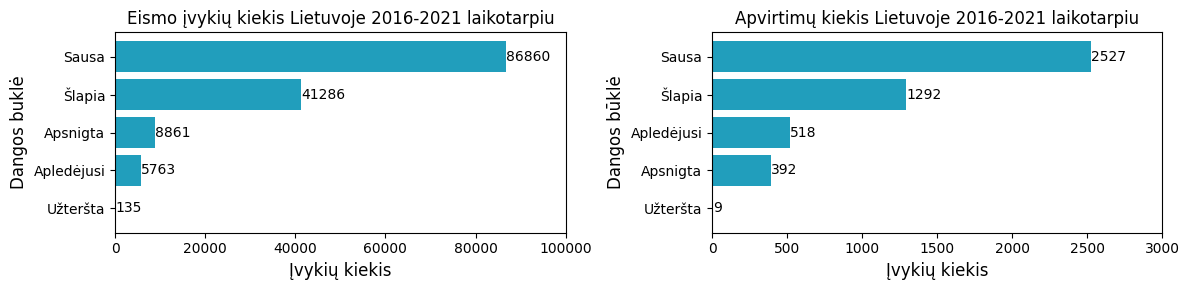

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3))

A = ax1.barh(danga['dangosBukle'], danga['kiekis'], color='#219ebc')
ax1.bar_label(A)
ax1.set_xlim(0, 100000)
ax1.set_xlabel('Įvykių kiekis', fontsize=12)
ax1.set_ylabel('Dangos buklė', fontsize=12)
ax1.set_title('Eismo įvykių kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

B = ax2.barh(danga_ap['dangosBukle'], danga_ap['kiekis'], color='#219ebc')
ax2.bar_label(B)
ax2.set_xlim(0, 3000)
ax2.set_xlabel('Įvykių kiekis', fontsize=12)
ax2.set_ylabel('Dangos būklė', fontsize=12)
ax2.set_title('Apvirtimų kiekis Lietuvoje '+str(pradz)+'-'+str(pab)+' laikotarpiu')

plt.tight_layout()
plt.show()

In [109]:
DB.close()

### Įžvalgos:
1. Eismo įvykių kiekis bėgant metams išlieka panašus - apie 24000. Tam gali turėti įtakos daugėjantis skaičius įregistruotų automobilių, tačiau geresnis vairuotojų sąmoningumas vairuojant automobilį. Vis dėlto įskaitinių eismo įvykių skaičius bėgant metams mažėja. Palyginus 2019 metų eismo įvykių kiekį Lietuvoje, matyti, kad daugiausiai jų nutinka gruodžio mėnesį, tam įtakos gali turėtų žmonių ruošimasis šventėms, dideli automobilių srautai miestuose bei važiavimas pas artimuosius per šventes.

2. Įvykių rūšių kiekis Lietuvoje duotu laikotarpiu buvo gana panašus - 10 arba 11.

3. Dažniausios eismo įvykių rūšys buvo susidūrimas, susidūrimas su stovinčia transporto priemone, užvažiavimas ant gyvūno, kliūties ar pėsčiojo.

4. Sužeistų asmenų kiekis neženkliai mažėja, tačiau vis tiek viršija 3000 per metus, iš kurių vaikai sudaro apie 17%. Žuvusių skaičius taip pat neženkliai mažėja - 180 per metus, iš kurių vaikai sudaro apie 4.5%.

5. Sužeistų asmenų skaičius dėl neblaivių vairuotojų sudarė 5.75%, o dėl apsvaigusių tik 0,03%.

6. Daugiausiai eismo įvykių įvyksta tada, kai būna giedra. Panaši tendencija išlieka ir vertinant susidūrimų kiekį.

7. Daugiausiai eismo įvykių bei susidūrimų įvyksta dieną.

8. Daugiausiai eismo įvykių bei susidūrimų įvyksta esant sausai dangai. Susidūrimų įvyksta daugiau esant apledijusiai dangai nei apsnigtai dangai, o dar daugiau esant šlapiai dangai.